In [1]:
root_dir = '20200309_운행계통계산용자료/'

In [14]:
## 필요한 라이브러리 import
import pandas as pd
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

In [10]:
input_file = open(root_dir+'BMS운행상세이력.txt','r')
init_line = input_file.readline().split(',')
data_line = input_file.readline().split(',')


"""
### col0 = 운행일시
### col1 = 회사ID
### col2 = 노선ID
### col3 = 차량ID
### col4 = 도착한 정류소 ID
### col5 = 정류소 도착 시간
### col6 = 차량번호
### col7 = 정류소 출발 시간 (col7-col5 = 손님탑승시간)
### col8 = 모름
### col9 = 모름
"""

for i,(col_name,data) in enumerate(zip(init_line,data_line)):
    print(i,col_name,data)

0 OPRAT_DE 20190902
1 CMPNY_ID 161005
2 ROUTE_ID 165000015
3 BUS_ID 161005080
4 STTN_ID 168000066
5 ARVL_DT 20190902095812
6 BUS_NO 인천70바2846
7 START_DT 20190902095817
8 PROGRS_DRC 
9 ARVL_TIME
 



In [11]:
stn_status = pd.read_excel(root_dir+'정류소현황목록_20190924.xlsx',
                          usecols=['정류소 명','정류소 번호','정류소 ID','위도','경도'],
                          dtype=str)
stn_status.head()

,정류소 명,정류소 번호,정류소 ID,위도,경도
0,(구)시민회관사거리,37319,163000319,126.68018830433286,37.457360395358165
1,(구)시민회관사거리,37326,163000326,126.67992703811578,37.45776642315442
2,(구)신현주공,42228,168000228,126.67339452968905,37.52184277702059
3,(구)현대백화점,40158,166000158,126.71126751729724,37.490948333960574
4,(주)경동세라믹스,89146,168001146,126.61697759175779,37.559185515339


In [27]:
velocity_G = nx.DiGraph()

stn_id_list = stn_status['정류소 ID'].to_list()

unidentified_stn = set()

input_file = open(root_dir+'BMS운행상세이력.txt','r')
init_line = input_file.readline().split(',')
line_count=1
date_temp = []

while True:
    line = input_file.readline()
    line_count+=1
    if not line:break
    line = line.split(',')
    if line ==['']:continue
    
    if line[0] not in date_temp:
        print(f'{line[0]} is reading...')
        date_temp.append(line[0])
    
    stn_id = line[4]
    dept_time = line[5]
    arr_time = line[7]
    
    if stn_id not in stn_id_list:
        unidentified_stn.add(stn_id)

20190902 is reading...
20190903 is reading...
20190904 is reading...
20190905 is reading...
20190906 is reading...
20190907 is reading...


In [33]:
busstop_file = root_dir+'SHP/busstop.shp'
busstop = gpd.read_file(busstop_file,encoding='euckr')
busstop.head(2)

,BMS_BUS_ST,BUS_STATIO,NAME,NAME_ENG,TRANSFER_T,BIS_NO,MAP_LONGIT,MAP_LATITU,DISTRICTID,CODINATESX,CODINATESY,AREA_CODE,IEBUS_BUS_,POINT_X,POINT_Y,geometry
0,1610017500,2805522,b'\xeb\xa7\x88\xec\x9e\xa5\xed\x8f\xac\xea\xb3...,None,0,35701,12633.340,3730.364,28110620,160646.519379,444969.881670,None,161000701,126.555732,37.506116,POINT (126.55573 37.50612)
1,1610036800,2807015,b'\xec\x84\x9c\xeb\x8b\xb9\xea\xb3\xa8',None,0,35702,12633.589,3730.258,28110620,161012.031383,444771.885254,None,161000702,126.559877,37.504348,POINT (126.55988 37.50435)


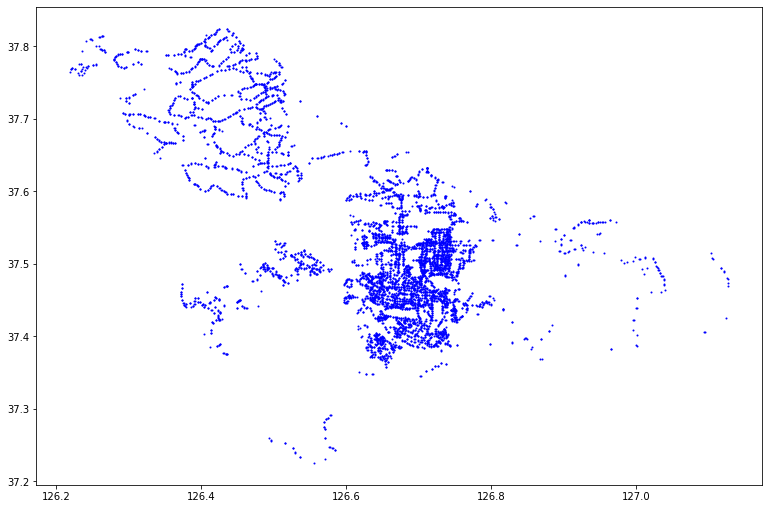

In [54]:
busstop.plot(figsize=(13,13),markersize=1,color='b')

In [34]:
node_file = root_dir+'SHP/node.shp'
node_df = gpd.read_file(node_file,encoding='euckr')
node_df.head(2)

,NODE_ID,NODE_NAME,NODE_LONGI,NODE_LATIT,NODE_TYPE,CODINATESX,CODINATESY,POINT_X,POINT_Y,geometry
0,1630026400,None,12639.574,3688.164,1.0,169817.046066843,440859.783110501,126.659629,37.469428,POINT (126.65963 37.46943)
1,1610067300,None,12631.536,3730.671,1.0,157989.511890616,445548.538778618,126.525646,37.511213,POINT (126.52565 37.51121)


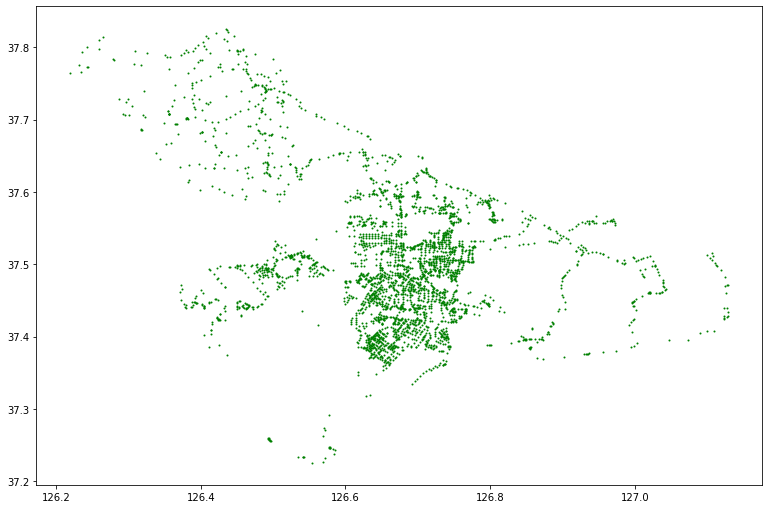

In [57]:
node_df.plot(figsize=(13,13),markersize=1,color='g')

In [35]:
link_file = root_dir+'SHP/link.shp'
link_df = gpd.read_file(link_file)
link_df.head(2)

,FT_NODE,F_ID,LENGTH,LINK_ID,L_COUNT,NAME,TYPE,T_ID,WIDTH,GRAY,AREA_CODE,ê¸¸ì´,geometry
0,1680052500-1680040500,1680052500,NaN,1,NaN,None,None,1680040500,NaN,None,None,0.003469,"LINESTRING (126.61266 37.59485, 126.61257 37.5..."
1,1680068500-1680040500,1680068500,NaN,4,NaN,None,None,1680040500,NaN,None,None,0.004761,"LINESTRING (126.60661 37.58937, 126.60664 37.5..."


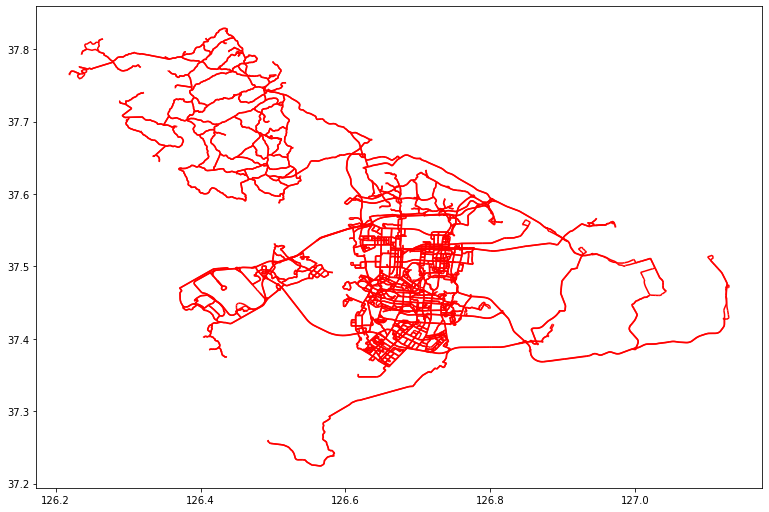

In [60]:
link_df.plot(figsize=(13,13),markersize=1,color='r')